In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import os
import shutil
import time

In [27]:
dir_save = "../.saves/" + "two kinks 2/" 

# Plot space average of u(t) for all experiments in the folder

In [28]:
N = 10000000
dt = 0.008
tmax = 5000
imax = int(tmax/dt)

Text(0.5, 1.0, 'Crank-Nicolson vary T,dt Cave=0 u0=1 $T/dt = 10$')

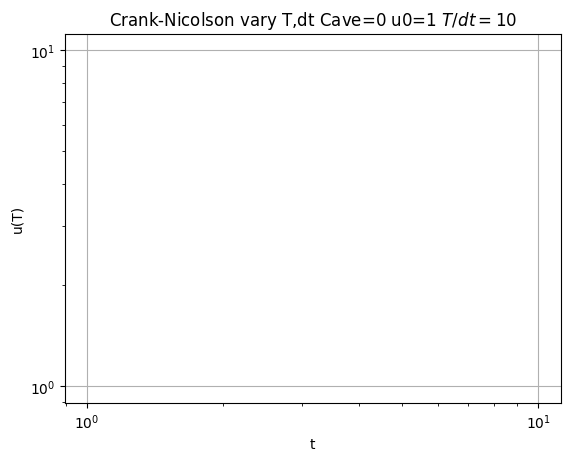

In [29]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_xlabel("t")
ax.set_ylabel("u(T)")
ax.set_yscale("log")
ax.grid()
ax.set_title("Crank-Nicolson vary T,dt Cave=0 u0=1 $T/dt = 10$")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


../.saves/two kinks 2/1708619830317
../.saves/two kinks 2/1708619817522


/home/rocco/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


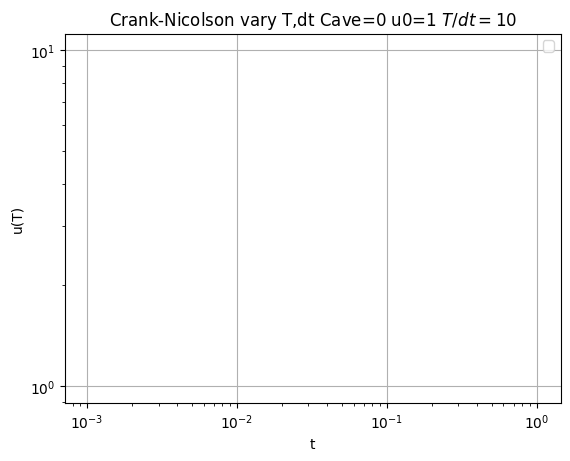

In [30]:
# Get all the simulations in the selected folder
for folder in sorted(os.listdir(dir_save), reverse=True):
    dir = dir_save + folder
    print(dir)
    # Get label of the curve
    f = open(dir + "/label.dat", "r")
    label = f.readline().strip('\n')
    f.close()

    f = open(dir + "/fileAveout.dat", "r")
    x = np.zeros(N)
    y = np.zeros(N)
    i = 0
    for row in f:
        a, b = row.split(" ")
        x[i] = float(a)
        y[i] = float(b)
        i = i + 1
        if i > imax:
            break
    ax.plot(x[0:min(i,imax)], y[0:min(i,imax)],label=label)
ax.legend()
fig

# Plot the final state u(x,tmax) for any experiment in the folder

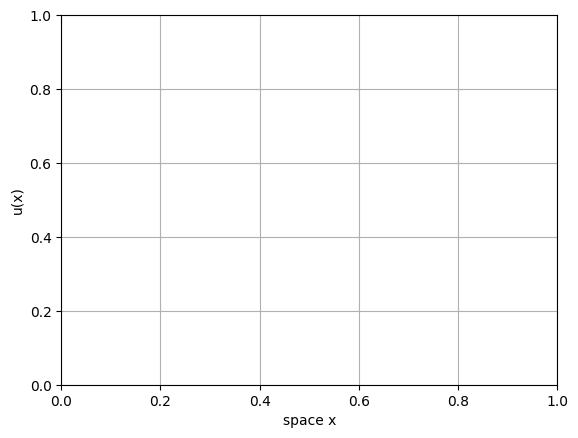

In [31]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_xlabel("space x")
ax.set_ylabel("u(x)")
ax.set_yscale("linear")
ax.grid()

../.saves/two kinks 2/1708619830317
1.0200000000
../.saves/two kinks 2/1708619817522
0.0200000000


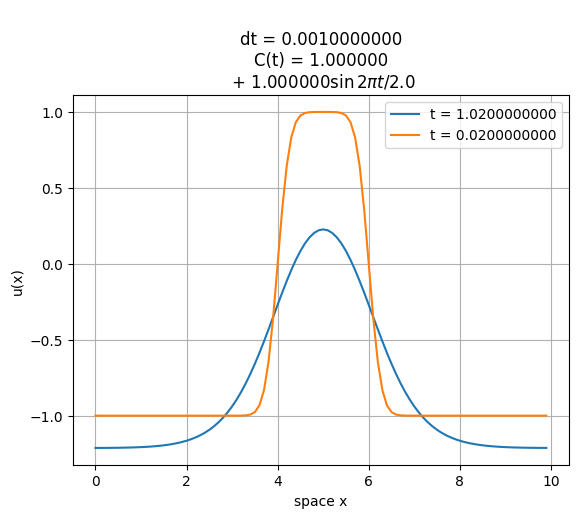

In [32]:
# Get all the simulations in the selected folder
for folder in sorted(os.listdir(dir_save), reverse=True):
    dir = dir_save + folder
    print(dir)
    # Get label of the curve
    #f = open(dir + "/label.dat", "r")
    #label = f.readline().strip('\n')
    #f.close()

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    x = np.zeros(N)
    y = np.zeros(N)
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            y[i-1] = float(b)
        else:
            N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")

        i = i + 1

    labell = "t = " + tmax
    ax.plot(x[0:i-1], y[0:i-1], label = labell)
    
T = 2*float(Thalf)
#eps = 0.5
#plt.ylim(-1-eps,1+eps)

label = ""
#u0 = 1
#label = label + "$u_0 = " + str(u0) + "$"
label= label + "\ndt = " + str(dt)
if T > 0:
    label = label + "\nC(t) = " + Cave + " + " + A + "$\sin{2\pi t/" + str(T) + "}$"
else:
    label = label + "\nC = " + Cave
#label = "dt = " + str(dt) 
#if float(T) > 0:
#label = label + "; T = " + str(T) + "; A = " + str(A)
#else:
#label = label + "; C = " + str(A) + " cost"

ax.set_title(label)
ax.set_xlabel("space x")
ax.set_ylabel("u(x)")


ax.legend()
fig